In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [1]:
ref_data = '''
#    mol     CCSD(T)        AFQMC/CISD          CCSDT             REF             AFQMC/HF
    B2    -49.27052714	-49.2703    0.0001	  -49.27227087	  -49.27384491    -49.2657    0.0003    
    BN    -79.20597437	-79.2016	  0.0003	  -79.20331193	  -79.20554682    -79.2030    0.0007 
    C2    -75.72647775	-75.7239	  0.0002	  -75.72512044	  -75.72771005    -75.7320    0.0006    
  Cl2O    -994.2163018	-994.2181	  0.0001	  -994.21674      -994.2184489    -994.2192   0.0003
  ClF3    -758.2800536	-758.2834 	0.0002	  -758.2808	      -758.283304     -758.2896   0.0004
  ClF5    -957.35520	  -957.3607	  0.0003    -957.35607      -957.36014      -957.36640	0.0005
  ClO3    -684.41612	  -684.4175	  0.0002    -684.41624      -684.41830      -684.41730	0.0004
  ClOO    -609.57907	  -609.5844	  0.0002    -609.58164      -609.58568      -609.58540	0.0003
ClOOCl    -1069.18631	  -1069.1891	0.0002    -1069.18686     -1069.18970     -1069.19200 0.0004
   F2O    -274.0716236	-274.0736	  0.0002	  -274.0721846	  -274.0745163    -274.0754	  0.0004
   FO2    -249.51577	  -249.5208	  0.0003    -249.51757      -249.52168      -249.52380	0.0003
  FOOF    -349.05618	  -349.0601	  0.0003    -349.05729      -349.06210      -349.06230	0.0003
    O3    -224.909286 	-224.9128	  0.0003	  -224.9094075	  -224.9147591    -224.91580	0.0003
  OClO    -609.5055511	-609.5073	  0.0003	  -609.50591      -609.5086808    -609.5099	  0.0004
    OF    -174.4980385	-174.49914	0.00009	  -174.4991431	  -174.5001424    -174.5005	  0.0002
    S3    -1192.993221	-1192.9958	0.0002	  -1192.9942896	  -1192.996996    -1192.9958	0.0002
    S4    -1590.67082	  -1590.6767	0.0003    -1590.67150     -1590.67690     -1590.67840 0.0003
'''

In [9]:
data_dict = {}
mols = []
for line in ref_data.splitlines():
    if not line.startswith('#'):
        if len(line) > 0 :
            parts = line.split()
            mol = parts[0]
            # mols = np.hstack((mols,mol))
            data_dict[mol] = {}
            data_dict[mol]['ccsd_t'] = float(parts[1])
            data_dict[mol]['afqmc_cisd'] = float(parts[2])
            data_dict[mol]['afqmc_cisd_err'] = float(parts[3])
            # data_dict[mol]['ccsdt'] = float(parts[4])
            data_dict[mol]['ref'] = float(parts[5])
            data_dict[mol]['afqmc_hf'] = float(parts[6])
            data_dict[mol]['afqmc_hf_err'] = float(parts[7])

In [10]:
my_data = '''
# mol       AFQMC/CCSD_PT               AFQMC/CCSD_PT2                     AFQMC/CISD               CCSD(T)
B2        -49.270414 +/- 0.000068     -49.271836 +/- 0.000072       -49.270451 +/- 0.000076     -49.265666541016365
BN        -79.197485 +/- 0.000154     -79.202281 +/- 0.000168       -79.200676 +/- 0.000154     -79.19262599723706
C2        -75.716958 +/- 0.000121     -75.725098 +/- 0.000155       -75.723083 +/- 0.000136     -75.71292506489533  
Cl2O      -994.217511 +/- 0.000106    -994.217741 +/- 0.000106      -994.217896 +/- 0.000097    -994.2163017704316
ClF3      -758.282142 +/- 0.000145    -758.281907 +/- 0.000168      -758.283508 +/- 0.000131    -758.2800536548064
ClF5      -957.358852 +/- 0.000267    -957.358593 +/- 0.000292      -957.359863 +/- 0.000228    -957.3551963604212
ClO3      -684.418089 +/- 0.000190    -684.417725 +/- 0.000218      -684.418213 +/- 0.000186    -684.4160044006004
ClOO      -609.582523 +/- 0.000140    -609.584393 +/- 0.000142      -609.584656 +/- 0.000162    -609.5749075087567
ClOOCl    -1069.188568 +/- 0.000157   -1069.188608 +/- 0.000209     -1069.188965 +/- 0.000163   -1069.1863125352806
F2O       -274.073272 +/- 0.000167    -274.072819 +/- 0.000153      -274.073914 +/- 0.000133    -274.071275006352
FO2       -249.516703 +/- 0.000149    -249.520278 +/- 0.000155      -249.520584 +/- 0.000187    -249.5103566937451
FOOF      -349.058586 +/- 0.000183    -349.060961 +/- 0.000178      -349.060577 +/- 0.000241    -349.04896333381424
O3        -224.909732 +/- 0.000131    -224.912691 +/- 0.000149      -224.912857 +/- 0.000198    -224.90084502686867
OClO      -609.505975 +/- 0.000156    -609.506599 +/- 0.000154      -609.507202 +/- 0.000135    -609.5048666591367
OF        -174.498553 +/- 0.000094    -174.498252 +/- 0.000099      -174.499222 +/- 0.000077    -174.49800453015396
S3        -1192.994886 +/- 0.000090   -1192.995642 +/- 0.000084     -1192.995361 +/- 0.000151   -1192.9877047726454
S4        -1590.675491 +/- 0.000126   -1590.676467 +/- 0.000163     -1590.676025 +/- 0.000182   -1590.6652140436447
'''

In [11]:
# data_dict = {}
mols = []
for line in my_data.splitlines():
    if not line.startswith('#'):
        if len(line) > 0 :
            parts = line.split()
            mol = parts[0]
            mols = np.hstack((mols,mol))
            # data_dict[mol] = {}
            data_dict[mol]['afqmc_ccsd_pt'] = float(parts[1])
            data_dict[mol]['afqmc_ccsd_pt_err'] = float(parts[3])
            data_dict[mol]['afqmc_ccsd_pt2'] = float(parts[4])
            data_dict[mol]['afqmc_ccsd_pt2_err'] = float(parts[6])
            # data_dict[mol]['afqmc_cisd'] = float(parts[7])
            # data_dict[mol]['afqmc_cisd_err'] = float(parts[9])
            # data_dict[mol]['ccsd_t'] = float(parts[10])

# for line in ref_data.splitlines():
#     if not line.startswith('#'):
#         if len(line) > 0 :
#             parts = line.split()
#             mol = parts[0]
#             data_dict[mol]['ref'] = float(parts[5])


In [15]:
ccsd_t = np.array([])
ref = np.array([])
afqmc_hf = np.array([])
afqmc_hf_err = np.array([])
afqmc_cisd = np.array([])
afqmc_cisd_err = np.array([])
afqmc_ccsd_pt = np.array([])
afqmc_ccsd_pt_err = np.array([])
afqmc_ccsd_pt2 = np.array([])
afqmc_ccsd_pt2_err = np.array([])
for mol in mols:
    ccsd_t = np.hstack((ccsd_t,data_dict[mol]['ccsd_t']))
    ref = np.hstack((ref,data_dict[mol]['ref']))
    afqmc_hf = np.hstack((afqmc_hf,data_dict[mol]['afqmc_hf']))
    afqmc_hf_err = np.hstack((afqmc_hf_err,data_dict[mol]['afqmc_hf_err']))
    afqmc_cisd = np.hstack((afqmc_cisd,data_dict[mol]['afqmc_cisd']))
    afqmc_cisd_err = np.hstack((afqmc_cisd_err,data_dict[mol]['afqmc_cisd_err']))
    afqmc_ccsd_pt = np.hstack((afqmc_ccsd_pt,data_dict[mol]['afqmc_ccsd_pt']))
    afqmc_ccsd_pt_err = np.hstack((afqmc_ccsd_pt_err,data_dict[mol]['afqmc_ccsd_pt_err']))
    afqmc_ccsd_pt2 = np.hstack((afqmc_ccsd_pt2,data_dict[mol]['afqmc_ccsd_pt2']))
    afqmc_ccsd_pt2_err = np.hstack((afqmc_ccsd_pt2_err,data_dict[mol]['afqmc_ccsd_pt2_err']))

In [16]:
afqmc_cisd_err

array([1.e-04, 3.e-04, 2.e-04, 1.e-04, 2.e-04, 3.e-04, 2.e-04, 2.e-04,
       2.e-04, 2.e-04, 3.e-04, 3.e-04, 3.e-04, 3.e-04, 9.e-05, 2.e-04,
       3.e-04])

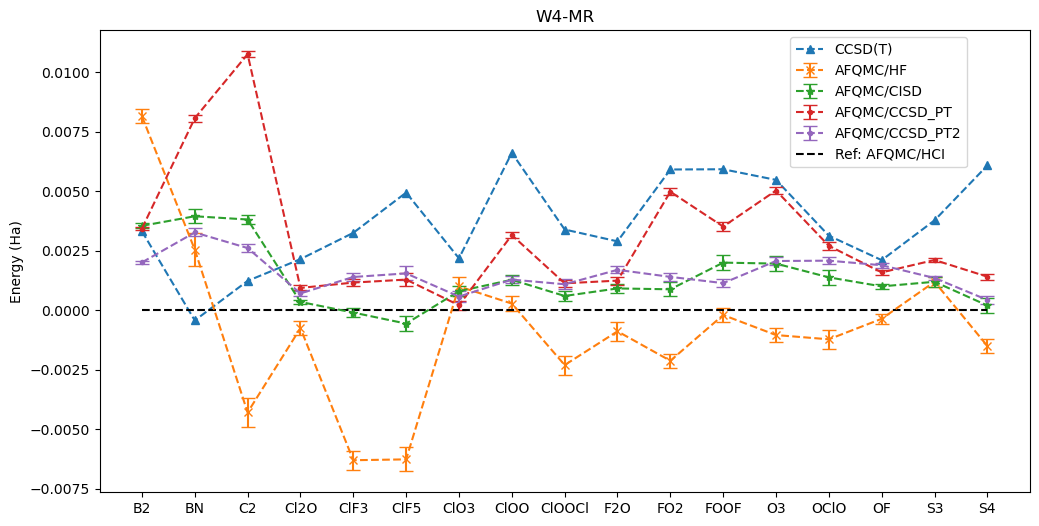

In [28]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(mols,ccsd_t-ref,'^--',color='C0',label='CCSD(T)')
plt.errorbar(mols, afqmc_hf-ref, yerr=afqmc_hf_err, fmt='x--', color='C1', capsize=5, label='AFQMC/HF')
plt.errorbar(mols, afqmc_cisd-ref, yerr=afqmc_cisd_err,fmt='*--',color='C2', capsize=5, label='AFQMC/CISD')
plt.errorbar(mols, afqmc_ccsd_pt-ref, yerr=afqmc_ccsd_pt_err, fmt='.--', color='C3', capsize=5, label='AFQMC/CCSD_PT')
plt.errorbar(mols, afqmc_ccsd_pt2-ref, yerr=afqmc_ccsd_pt2_err, fmt='.--', color='C4', capsize=5, label='AFQMC/CCSD_PT2')
plt.plot(mols,[0]*len(mols),'--',color='black',label='Ref: AFQMC/HCI')
plt.ylabel('Energy (Ha)')
plt.title('W4-MR')
handles, labels = plt.gca().get_legend_handles_labels()
order = ['CCSD(T)', 'AFQMC/HF', 'AFQMC/CISD', 'AFQMC/CCSD_PT', 'AFQMC/CCSD_PT2', 'Ref: AFQMC/HCI']
ordered_handles = [handles[labels.index(l)] for l in order]
ordered_labels = order
plt.legend(ordered_handles, ordered_labels, loc='upper right', bbox_to_anchor=(0.94, 1))
plt.show()

In [ ]:
import numpy as np
n_mol = len(mols)
ccsd_t_msd = np.sqrt(np.sum((ccsd_t-ref)**2)/n_mol)*1000
afqmc_hf_msd = np.sqrt(np.sum((afqmc_hf-ref)**2)/n_mol)*1000
afqmc_cisd_msd = np.sqrt(np.sum((afqmc_cisd-ref)**2)/n_mol)*1000
afqmc_ccsd_pt_msd = np.sqrt(np.sum((afqmc_ccsd_pt-ref)**2)/n_mol)*1000
afqmc_ccsd_pt2_msd = np.sqrt(np.sum((afqmc_ccsd_pt2-ref)**2)/n_mol)*1000
afqmc_hf_msd_err = np.sqrt(sum(afqmc_hf_err**2)/n_mol)*1000
afqmc_cisd_msd_err = np.sqrt(sum(afqmc_cisd_err**2)/n_mol)*1000
afqmc_ccsd_pt_msd_err = np.sqrt(sum(afqmc_ccsd_pt_err**2)/n_mol)*1000
afqmc_ccsd_pt2_msd_err = np.sqrt(sum(afqmc_ccsd_pt2_err**2)/n_mol)*1000
print('W4-MR DATA ')
print(f'CCSD(T) RMSD from Ref {ccsd_t_msd:.2f} mHa')
print(f'AFQMC/HF RMSD from Ref {afqmc_hf_msd:.2f} +/- {afqmc_hf_msd_err:.2f} mHa')
print(f'AFQMC/CISD RMSD from Ref {afqmc_cisd_msd:.2f} +/- {afqmc_cisd_msd_err:.2f}  mHa')
print(f'AFQMC/CCSD_PT RMSD from Ref {afqmc_ccsd_pt_msd:.2f} +/- {afqmc_ccsd_pt_msd_err:.2f} mHa')
print(f'AFQMC/CCSD_PT2 RMSD from Ref {afqmc_ccsd_pt2_msd:.2f} +/- {afqmc_ccsd_pt2_msd_err:.2f} mHa')

HEAT DATA 
CCSD(T) RMSD from Ref 4.10 mHa
AFQMC/HF RMSD from Ref 3.33 +/- 0.39 mHa
AFQMC/CISD RMSD from Ref 1.87 +/- 0.23  mHa
AFQMC/CCSD_PT RMSD from Ref 4.11 +/- 0.15 mHa
AFQMC/CCSD_PT2 RMSD from Ref 1.71 +/- 0.16 mHa
